# Spark Context

## Spark Context refers to connection to a Spark Cluster
* ### Only One Spark Content per JVM
* ### Create: RDD, accumulators, broadcast variables
* ### Use stop() before creating a new Spark Content

In [5]:
from pyspark import SparkContext, SparkConf

### Different ways to create SparkContext
1. #### First way

In [2]:
conf = SparkConf().setAppName("Demo").setMaster("local")

In [3]:
sc = SparkContext(conf = conf)

In [4]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.port', '57238'),
 ('spark.app.id', 'local-1629281759929'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.app.startTime', '1629281758749'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'Demo'),
 ('spark.driver.host', 'DESKTOP-BVPM4U6')]

In [5]:
sc.stop()

2. #### Second way

In [6]:
sc = SparkContext()

In [7]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.startTime', '1629282038866'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.port', '61207'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.id', 'local-1629282038938'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'Demo'),
 ('spark.driver.host', 'DESKTOP-BVPM4U6')]

In [8]:
sc.stop()

3. #### Third way

In [9]:
sc = SparkContext("local","First App")

In [10]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.id', 'local-1629282243760'),
 ('spark.app.startTime', '1629282243696'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.port', '59293'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.name', 'First App'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.host', 'DESKTOP-BVPM4U6')]

In [12]:
sc.stop()

# RDD( Resilient Distributed Dataset)
* ## immutable distributed collection of objects
* ## can be split into multiple partitions

## RDD can be created in two ways
1. ### loading external dataset

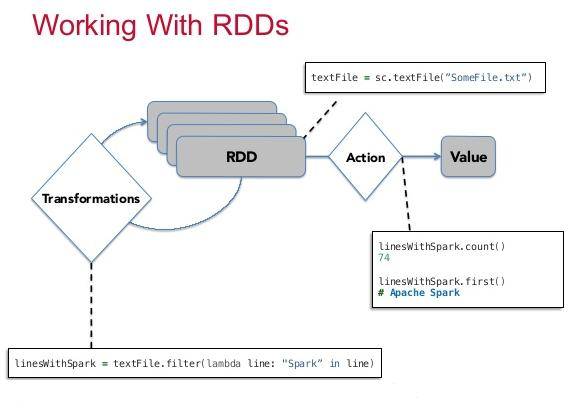

In [1]:
from IPython.display import Image
Image(filename='rdd.png')

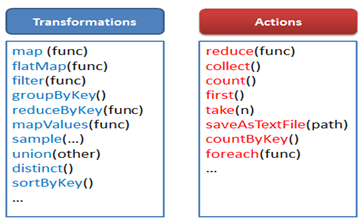

In [2]:
Image(filename='aNt.png')

## RDD Basic Actions

In [6]:
sc = SparkContext()

In [7]:
names = sc.parallelize(['rohan','bhupen','leena','mohit','bhushan','thadani'])

In [8]:
type(names)

pyspark.rdd.RDD

In [9]:
names.collect()

['rohan', 'bhupen', 'leena', 'mohit', 'bhushan', 'thadani']

In [11]:
names.countByValue()

defaultdict(int,
            {'rohan': 1,
             'bhupen': 1,
             'leena': 1,
             'mohit': 1,
             'bhushan': 1,
             'thadani': 1})

### Foreach action
#### Takes each element and applies a function, does not return any value

In [12]:
def f(x):
    print(x)

In [13]:
a = sc.parallelize([1,2,3,4]).foreach(lambda x : f(x))

In [14]:
type(a)

NoneType

In [15]:
path = sc.textFile('Paths.txt')

In [16]:
path.collect()

['C:\\spark-3.1.2-bin-hadoop3.2',
 'C:\\spark-3.1.2-bin-hadoop3.2\\bin',
 '',
 '',
 'C:\\Program Files\\Java\\jdk1.8.0_301',
 'C:\\Program Files\\Java\\jdk1.8.0_301\\bin',
 '',
 '',
 'C:\\Users\\ROHAN\\AppData\\Local\\Programs\\Python',
 'C:\\Users\\ROHAN\\AppData\\Local\\Programs\\Python\\Python39\\Scripts']

In [17]:
path.first()

'C:\\spark-3.1.2-bin-hadoop3.2'

In [18]:
path.count()

10

In [20]:
path.distinct().count()

7

In [21]:
numbers = sc.parallelize([1,2,3,2,4,5,5,6,1,4])

In [22]:
numbers.countByValue()

defaultdict(int, {1: 2, 2: 2, 3: 1, 4: 2, 5: 2, 6: 1})

### Glom function
#### converts each partition into tuples

In [24]:
numbers.glom().collect()

[[], [1], [2], [3], [2], [4], [], [5], [5], [6], [1], [4]]

In [25]:
numbers2 = sc.parallelize([1,2,3,2,4,5,5,6,1,4],2)

In [26]:
numbers2.glom().collect()

[[1, 2, 3, 2, 4], [5, 5, 6, 1, 4]]

In [27]:
numbers2.glom().collect()[0]

[1, 2, 3, 2, 4]

In [28]:
type(numbers.glom())

pyspark.rdd.PipelinedRDD

In [29]:
numbers.max()

6

In [30]:
numbers.min()

1

In [31]:
numbers.mean()

3.3

In [32]:
numbers.reduce(lambda a,b:a+b)

33

In [33]:
numbers.reduce(lambda a,b:a*b)

28800

In [35]:
numbers.reduce(lambda a,b: a if a>b else b)

6

In [43]:
def myfun(a,b):
    return a*2 + b*2

In [44]:
numbers.reduce(myfun)

3116

In [45]:
numbers.takeOrdered(3)

[1, 1, 2]

### Fold function
#### adds more if more partitions

In [46]:
numbers.reduce(lambda a,b: a+b)

33

In [47]:
numbers.fold(1,lambda a,b:a+b)

46

In [48]:
numbers2.reduce(lambda a,b:a+b)

33

In [49]:
numbers2.fold(1,lambda a,b:a+b)

36

In [50]:
from operator import add,mul
numbers.fold(1,add)

46

In [52]:
numbers.fold(1,mul)

28800

In [53]:
sc.stop()